# Value-at-Risk and Expected Shortfall
It is recommended to view these notes in a jupyter Notebook from an Anaconda installation
## Value-at-Risk
Assume we have a loss distribution that is normally distributed with mean -2 and standard deviation 10. To find 95% VaR, we use $$VaR = \mu + z_{\alpha}\sigma$$

In [2]:
#Import packages
from scipy.stats import norm
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [3]:
z_95 = norm.ppf(0.95)
print(z_95)
# ppf is the percentage point function which is basically the inverse cdf

1.6448536269514722


In [4]:
print('Using the formula we get that Value-at-Risk is {:.2f}'.format(-2+z_95*10))

Using the formula we get that Value-at-Risk is 14.45


We can also use

In [6]:
VaR_95_alt = norm.ppf(0.95,loc=-2,scale=10) 
print('This also gives us VaR as {:.2f}'.format(VaR_95_alt))

This also gives us VaR as 14.45


We can also calculate many VaR without looping by using a list or as in this case a numpy array


In [8]:
many_VaR = norm.ppf(np.arange(0.95,0.99,0.01),loc=-2,scale=10) 
print(many_VaR)

[14.44853627 15.50686071 16.80793608 18.53748911 21.26347874]


Text(0.5, 0, 'VaR level')

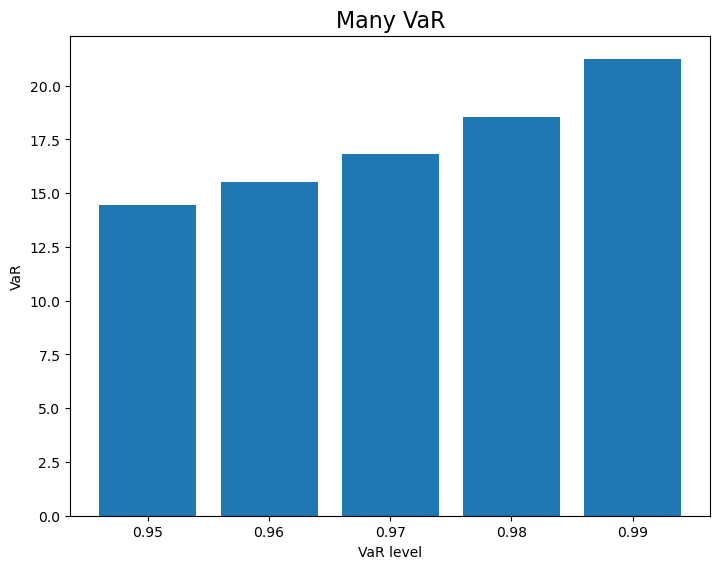

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['0.95','0.96','0.97','0.98','0.99'],many_VaR)
ax.set_title('Many VaR',fontsize=16)
ax.set_ylabel('VaR')
ax.set_xlabel('VaR level')

In [12]:
even_more_VaR = []
for s in range(5,21):
    even_more_VaR.append(norm.ppf(np.arange(0.95,1,0.01),loc=-2,scale=s))

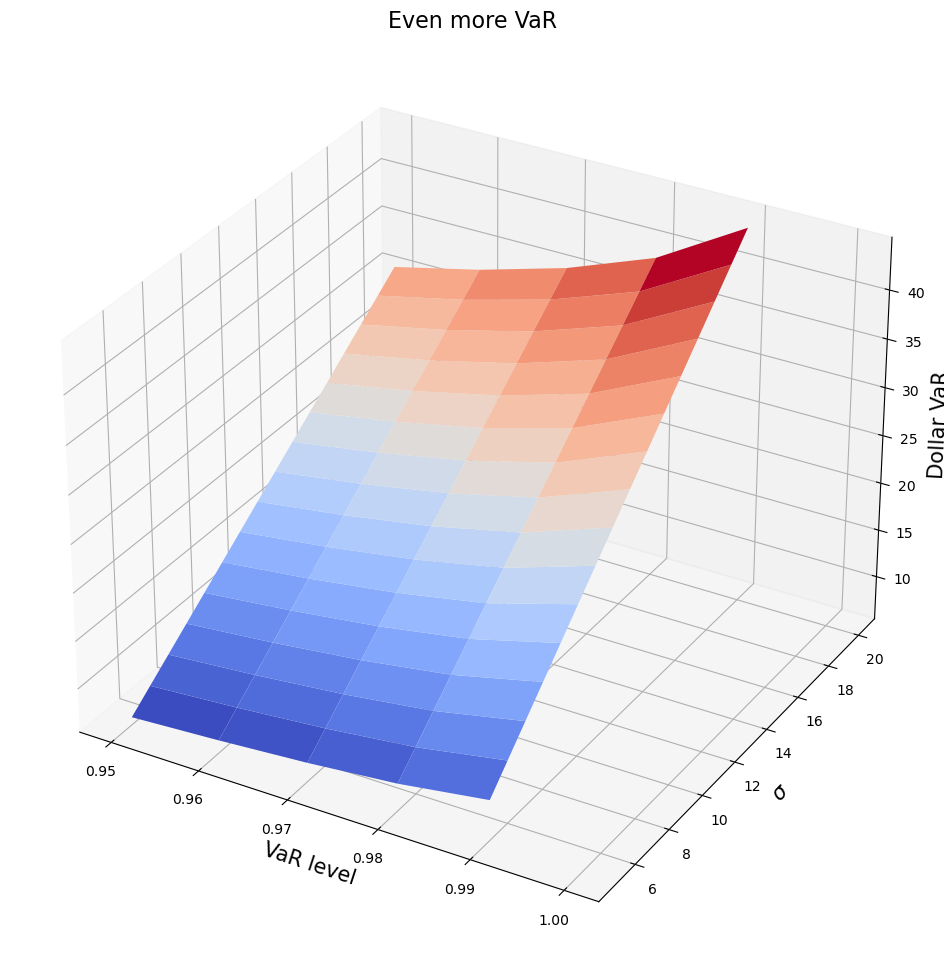

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
y = np.arange(5, 21, 1)
x = np.arange(0.95, 1.0, 0.01)
x, y = np.meshgrid(x, y)
z = np.asmatrix(even_more_VaR) # arrange VaR as 16x5 matrix
# Plot the surface.
surf = ax.plot_surface(x, y, z,cmap=cm.coolwarm)
ax.set_xlabel('VaR level',fontsize=15)
ax.set_ylabel("$\sigma$",fontsize=15)
ax.set_zlabel('Dollar VaR',fontsize=15)
ax.set_title('Even more VaR',fontsize=16)
fig.set_size_inches(15, 12)

## Expected shortfall
We do the "approximate an integral with a sum" example from video lecture 4. We want to calculate 95% ES for a normal distribution with parameters

In [16]:
my = -6
sig = 8
VaRgrid = np.arange(0.95,0.99,0.01) # VaRs to calculate
nTerms = len(VaRgrid) # number of terms in sum, 5 is as in slides

We know 
 $${ES}_{\alpha}=\frac{1}{1-\alpha}\int\limits_{x=\alpha}^{x=1} \! {VaR}_x \, {d}x $$

$$ \approx \frac{1}{1-\alpha}\left[ \frac{1-\alpha}{n}\,\mathrm{VaR}_{\alpha_0}+\frac{1-\alpha}{n}\,{VaR}_{\alpha_1}+...+\frac{1-\alpha}{n}\,{VaR}_{\alpha_{n-1}} \right] $$

$$ =\frac{1}{n}\left( {VaR}_{\alpha_0}+{VaR}_{\alpha_1}+...+{VaR}_{\alpha_{n-1}} \right)$$

In [17]:
VaRs = norm.ppf(VaRgrid,loc=my,scale=sig) # We get same numbers as slide 6 L4.
print(VaRs)

[ 7.15882902  8.00548857  9.04634887 10.42999129 12.61078299]


In [18]:
approx_ES95 = (nTerms**-1)*sum(VaRs)
print("Approximate ES for five terms is: {:.4f}".format(approx_ES95))

Approximate ES for five terms is: 9.4503


In [19]:
#Let's check if the slides with 500 rectangels is correct (they say 10.48)
VaRgrid = np.arange(0.95,0.9999,0.0001) # VaRs to calculate
nTerms = len(VaRgrid) # number of terms in sum, 500 in this case
VaRs = norm.ppf(VaRgrid,loc=my,scale=sig) 
approx_ES95 = (nTerms**-1)*sum(VaRs)
print("Approximate ES for 500 terms is: {:.4f}".format(approx_ES95))

Approximate ES for 500 terms is: 10.4816


When the loss distribution is N we have a closed form expression for ES  $${ES}_{\alpha}= \mu+\sigma\frac{f_{{std}}(z_{\alpha})}{1-\alpha} \: \text{ where } \: f_{{std}}(z_{\alpha})=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z_{\alpha}^2}$$ the last function is the standard normal probability density function.

In [20]:
print("Z_95 is {:.4f}".format(norm.ppf(0.95)))
exact_ES95 = my+(sig*1/m.sqrt(2*m.pi)*m.exp(-0.5*1.6449**2))/0.05

Z_95 is 1.6449


In [21]:
print("Exact ES for Gaussian case is: {:.4f}".format(exact_ES95))

Exact ES for Gaussian case is: 10.5004


In [22]:
exact_ES95_alt = my+sig*norm.pdf(1.6449)/0.05

In [23]:
print("Exact ES for Gaussian case is: {:.4f}".format(exact_ES95_alt))

Exact ES for Gaussian case is: 10.5004


Note that since VaR is increasing in alpha the approximation will always underestimate the exact ES, for five terms the approximation is pretty bad but with 500 very good.
Lastly we take a look at how ES varies with sigma and alpha level using the same values as for VaR.

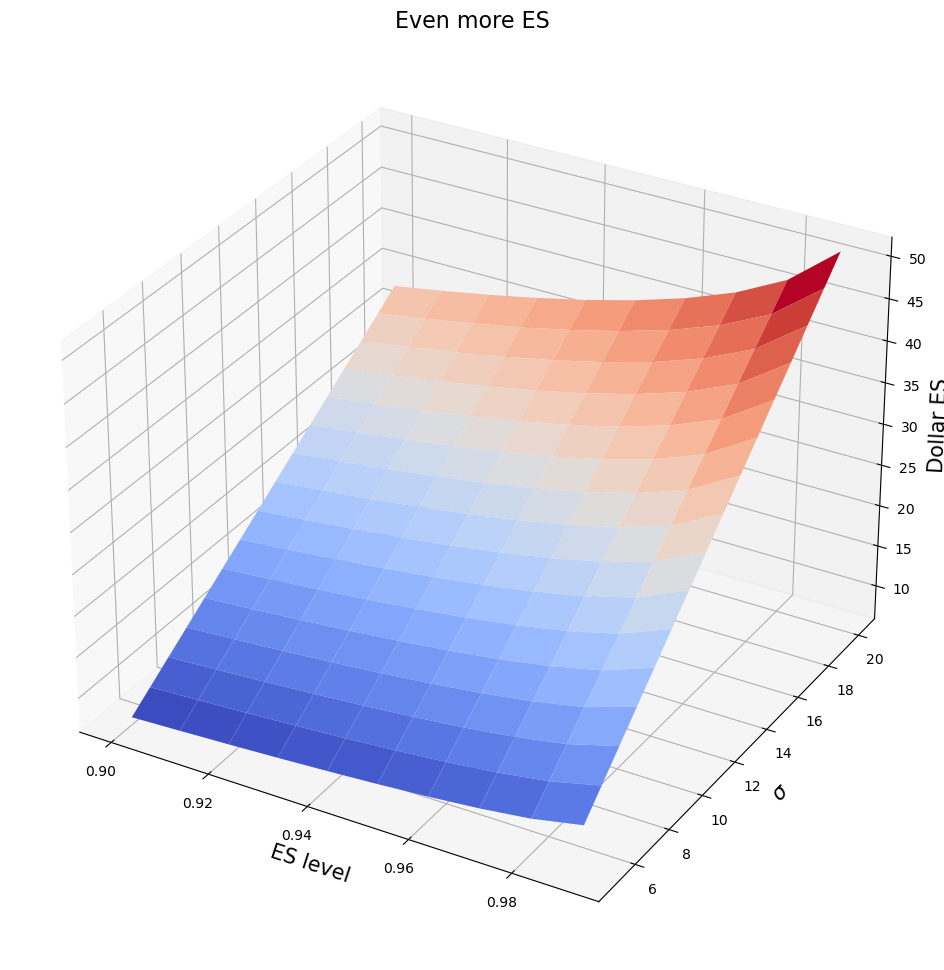

In [25]:
my = -2
sig_vec = np.arange(5,21) 
many_exact_ES = []
for a in np.arange(0.9,1.0,0.01):
    many_exact_ES.append(my+sig_vec*norm.pdf(norm.ppf(a))/(1-a))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
y = sig_vec
x = np.arange(0.90, 1.0, 0.01)
x, y = np.meshgrid(x, y)
z = np.transpose(np.asmatrix(many_exact_ES)) # arrange ES as 16x9 matrix
# Plot the surface.
surf = ax.plot_surface(x, y, z,cmap=cm.coolwarm)
ax.set_xlabel('ES level',fontsize=15)
ax.set_ylabel("$\sigma$",fontsize=15)
ax.set_zlabel('Dollar ES',fontsize=15)
ax.set_title('Even more ES',fontsize=16)
fig.set_size_inches(15, 12)